# Machine Learning
Teknik untuk bisa membuat prediksi berdasarkan data dan algoritma.

Kita berikan data kepada python, kita pilih algoritma yang mau digunakan, kita latih "model" nya, lalu kita bisa pakai "model" yang sudah dilatih ini untuk membuat prediksi

## Supervised
teknik machine learning untuk membuat prediksi dari data

### Regression
saat kita mau membuat prediksi sebuah angka yang continuous, terus berjalan, seperti berat badan, tinggi badan, harga, waktu, dan lainnya

algoritma pilihan ada banyak:
- linear regression
- polynomial regression
- dan lainnya

### Classification
saat kita mau membuat prediksi untuk hal hal yang fix, discrete, seperti menebak ini gambar kucing atau kelinci (2 pilihan), lemparan dadu berikutnya akan dapat angka berapa? (1,2,3,4,5,6 --> enam pilihan), restoran ini bagus/ tidak? (2 pilihan)

algoritma pilihan ada banyak:
- logistic regression
- naive bayes
- decision tree
- random forest
- support vector machine
- dan lainnya


## Unsupervised
teknik machine learning untuk merapikan data, misalnya:

### Clustering
mengelompokkan data berdasarkan yang mirip mirip

### Dimensionality Reduction
mengurangi dimensi sebuah data

In [84]:
# import package
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(["ggplot"])

# Linear Regression
from sklearn.linear_model import LinearRegression

# encoding
from sklearn.preprocessing import LabelEncoder

# Poynomial Regression
from sklearn.preprocessing import PolynomialFeatures

In [6]:
# import data
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

df = pd.DataFrame({"luas tanah":x.reshape(6), "harga rumah":y})
df

,luas tanah,harga rumah
0,5,5
1,15,20
2,25,14
3,35,32
4,45,22
5,55,38


<AxesSubplot:xlabel='luas tanah', ylabel='harga rumah'>

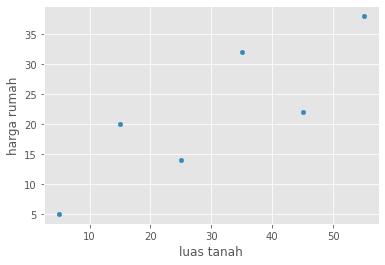

In [7]:
df.plot(kind="scatter", x="luas tanah", y="harga rumah")

In [8]:
df["luas tanah"].corr(df["harga rumah"])

0.8460943291075494

In [13]:
# bagaimana cara membuat prediksi untuk menebak berapa harga rumah saat luas tanahnya 100
# pakai teknik machine learning
# 1. Data Collection --> selesai, kita sudah siapkan data dummy df
# 2. Data Preparation --> selesai, tidak ada yg perlu dirapikan dari data dummy yang kita buat
# fitur adalah data yang digunakan sebagai input
# target adalah data yang digunakan sebagai output

# misalkan kita mau menebak "harga rumah" dari "luas rumah", 
# artinya "harga rumah" = target
# "luas rumah" = fitur --> 1 fitur, 1 kolom

# misalkan kita mau menebak "harga rumah" dari "luas rumah" dan "lokasi", 
# artinya "harga rumah" = target
# "luas rumah" dan "lokasi" = fitur --> ada 2 fitur, 2 kolom

# jumlah fitur tidak dibatasi, bisa 1,2,3,... ratusan ribuan juga bisa

#*notes kalau fitur harus dalam bentuk 2D, setiap fitur 1 kolom
fitur = df[["luas tanah"]]
target = df["harga rumah"]

# 3. training

# training, buat model lalu masukkan datanya
model = LinearRegression()
model.fit(fitur, target)

LinearRegression()

c:\Users\stefa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'skor model:0.7158756137479542')

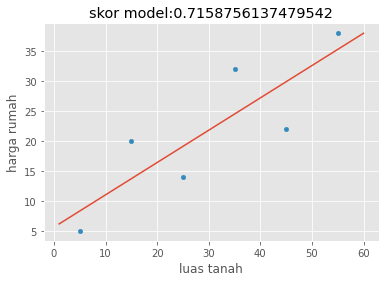

In [30]:
# 4. evaluasi
# seberapa akurat model ini?

# lihat hasil prediksi
# hasil prediksi harga rumah di saat luas tanah 1-60
x_dummy = np.arange(1,61).reshape((-1,1))
y_pred = model.predict(x_dummy)

# cek skor
skor = model.score(fitur, target)

# plot (optional)
df.plot(kind="scatter", x="luas tanah", y="harga rumah")
plt.plot(x_dummy, y_pred)
plt.title("skor model:" + str(skor))

In [31]:
# 5. tuning

In [32]:
# menggunakan model untuk prediksi.
# luas tanah 100 harga rumah berapa?
model.predict([[100]])

c:\Users\stefa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([59.63333333])

In [37]:
# contoh lain linear regression, dengan data nbaallelo.csv
# 1. import data

df_nba = pd.read_csv("dataset/nbaallelo.csv")
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

In [38]:
# 2. rapiin data
# hapus kolom yang tidak dipakai

df_nba.columns

Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
       'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
       'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
       'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes'],
      dtype='object')

In [39]:
df_nba = df_nba.drop(columns=['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id',
       'seasongame', 'is_playoffs', 'fran_id', 'elo_i',
       'elo_n', 'win_equiv', 'opp_fran', 'opp_elo_i',
       'opp_elo_n', 'game_location', 'forecast', 'notes'])

In [40]:
df_nba.head()

,date_game,team_id,pts,opp_id,opp_pts,game_result
0,11/1/1946,TRH,66,NYK,68,L
1,11/1/1946,NYK,68,TRH,66,W
2,11/2/1946,CHS,63,NYK,47,W
3,11/2/1946,NYK,47,CHS,63,L
4,11/2/1946,DTF,33,WSC,50,L


In [53]:
# menebak pts yang didapat sebuah tim
# fitur team_id
# target pts

# model machine learning hanya menerima data bersifat numerik
# untuk data tipe string, kita akan ubah jadi numerik menggunakan encoding
le = LabelEncoder()
team_encoded = le.fit_transform(df_nba["team_id"])


le.classes_

df_team_code = pd.DataFrame({"team_id":le.classes_})
df_team_code

,team_id
0,ANA
1,AND
2,ATL
3,BAL
4,BLB
...,...
99,WAS
100,WAT
101,WSA
102,WSB


In [54]:
fitur = pd.DataFrame({"team_id":team_encoded})

fitur

,team_id
0,93
1,63
2,15
3,63
4,27
...,...
126309,18
126310,30
126311,18
126312,18


In [55]:
target = df_nba["pts"]

target

0          66
1          68
2          63
3          47
4          33
         ... 
126309     82
126310    104
126311     91
126312     97
126313    105
Name: pts, Length: 126314, dtype: int64

In [56]:
# 3. training
model = LinearRegression()
model.fit(fitur, target)

LinearRegression()

In [59]:
# buat prediksi
# tim MMS kira2 skor nya berapa di sebuah game?

# df_team_code.loc[50] # tim MMS ada di code nomor 50
model.predict([[50]])

c:\Users\stefa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([102.70203863])

In [66]:
# tim BOS kira2 skor nya berapa di sebuah game?
df_team_code[df_team_code["team_id"]=="BOS"]

model.predict([[5]])


c:\Users\stefa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([103.16788708])

In [67]:
# 4. evaluasi

model.score(fitur, target)

0.0004040106797249532

In [ ]:
# skor yang sangat rendah ini artinya model tidak bisa memprediksi dengan baik
# biasanya skor kita mau di 60-80% 0.6-0.8

In [68]:
# 5. tuning

In [70]:
# ulang lagi, tapi kali ini kita masukkan juga fitur lainnya

# 3 fitur:
# tahun pertandingan
# tim kita
# tim lawan

# target:
# pts

# convert date_game jadi tipe data datetime lalu buat kolom baru untuk tahun
df_nba["date_game"] = pd.to_datetime(df_nba["date_game"])

df_nba

,date_game,team_id,pts,opp_id,opp_pts,game_result
0,1946-11-01,TRH,66,NYK,68,L
1,1946-11-01,NYK,68,TRH,66,W
2,1946-11-02,CHS,63,NYK,47,W
3,1946-11-02,NYK,47,CHS,63,L
4,1946-11-02,DTF,33,WSC,50,L
...,...,...,...,...,...,...
126309,2015-06-11,CLE,82,GSW,103,L
126310,2015-06-14,GSW,104,CLE,91,W
126311,2015-06-14,CLE,91,GSW,104,L
126312,2015-06-16,CLE,97,GSW,105,L


In [71]:
df_nba["year"] = df_nba["date_game"].dt.year

In [72]:
df_nba.head()

,date_game,team_id,pts,opp_id,opp_pts,game_result,year
0,1946-11-01,TRH,66,NYK,68,L,1946
1,1946-11-01,NYK,68,TRH,66,W,1946
2,1946-11-02,CHS,63,NYK,47,W,1946
3,1946-11-02,NYK,47,CHS,63,L,1946
4,1946-11-02,DTF,33,WSC,50,L,1946


In [73]:
# encoding team_id dan opp_id

le = LabelEncoder()
encoded_team_id = le.fit_transform(df_nba["team_id"])
encoding_key = pd.DataFrame({"team_id":le.classes_})


encoded_opp_id = le.fit_transform(df_nba["opp_id"])
encoding_key["opp_id"] = le.classes_

encoding_key

,team_id,opp_id
0,ANA,ANA
1,AND,AND
2,ATL,ATL
3,BAL,BAL
4,BLB,BLB
...,...,...
99,WAS,WAS
100,WAT,WAT
101,WSA,WSA
102,WSB,WSB


In [74]:
fitur = pd.DataFrame({
    "team_id":encoded_team_id, 
    "opp_id":encoded_opp_id, 
    "year":df_nba["year"]
    })

fitur

,team_id,opp_id,year
0,93,63,1946
1,63,93,1946
2,15,63,1946
3,63,15,1946
4,27,103,1946
...,...,...,...
126309,18,30,2015
126310,30,18,2015
126311,18,30,2015
126312,18,30,2015


In [75]:
target

0          66
1          68
2          63
3          47
4          33
         ... 
126309     82
126310    104
126311     91
126312     97
126313    105
Name: pts, Length: 126314, dtype: int64

In [76]:
# 3. latih model
model = LinearRegression()
model.fit(fitur, target)

LinearRegression()

In [77]:
# 4. evaluasi model
model.score(fitur, target)

0.016098339431526387

In [78]:
# kemungkinan besar algoritma ML yang kita gunakan tidak cocok untuk
# memprediksi data seperti ini

# karena itu kita tidak bisa bergantung pada satu saja algoritma ML
# kita perlu pelajari algoritma ML lainnya
# cari algoritma yang paling cocok, paling bisa membuat prediksi untuk setiap data berbeda



# Polynomial Regression
mirip Linear Regression tapi dengan perubahan garis nya tidak Linear, garisnya bisa belok belok menggunakan formula matematika Polynomial

In [80]:
# import data
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

df = pd.DataFrame({"luas tanah":x.reshape(6), "harga rumah":y})
df

,luas tanah,harga rumah
0,5,5
1,15,20
2,25,14
3,35,32
4,45,22
5,55,38


<AxesSubplot:xlabel='luas tanah', ylabel='harga rumah'>

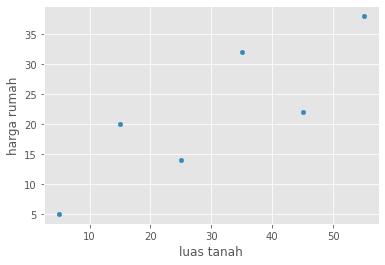

In [82]:
df.plot(kind="scatter", x="luas tanah", y="harga rumah")

In [100]:
# siapin data
fitur = df[["luas tanah"]]
display(fitur)

target = df["harga rumah"]

# data untuk polynomial regresison kita ubah jadi bentuk polynomial dulu
# degree 1 --> tidak belok, Linear Regression
# degree 2 --> belok 1 kali
# degree 3 --> belok 2 kali
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(fitur)

fitur_poly = transformer.transform(fitur)
fitur_poly

,luas tanah
0,5
1,15
2,25
3,35
4,45
5,55


array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  35., 1225.],
       [  45., 2025.],
       [  55., 3025.]])

In [101]:
# latih model
model = LinearRegression()
model.fit(fitur_poly, target)

LinearRegression()

Text(0.5, 1.0, 'skor model:0.7178963893249607')

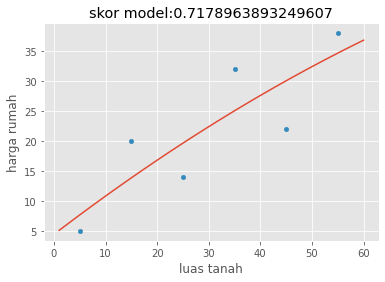

In [102]:
# lihat hasil prediksi
# hasil prediksi harga rumah di saat luas tanah 1-60
x_dummy = np.arange(1,61).reshape((-1,1))
# ubah dummy data jadi bentuk polynomial juga
x_dummy_poly = transformer.fit_transform(x_dummy)

y_pred = model.predict(x_dummy_poly)

# cek skor
skor = model.score(fitur_poly, target)

# plot (optional)
df.plot(kind="scatter", x="luas tanah", y="harga rumah")
plt.plot(x_dummy, y_pred)
plt.title("skor model:" + str(skor))

In [103]:
# kalau menggunakan model polynomial regression
# data fitur yang mau kita masukkan untuk di prediksi
# perlu diubah jadi bentuk polynomial dulu
# contoh: luas tanah 100 harga rumahnya berapa?

luas_tanah = [[100]]
luas_tanah_poly = transformer.fit_transform(luas_tanah)
model.predict(luas_tanah_poly)

array([50.58125])

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[15 11  2  8 25 32]


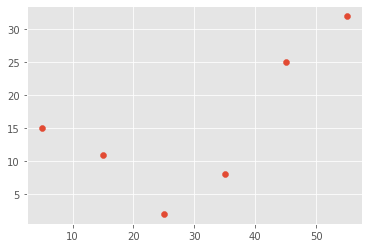

In [106]:
# Polynomial Regression

# siapin data
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])
print(x)
print(y)
plt.scatter(x=x, y=y)

In [107]:
# rapiin data
fitur = x
target = y

transformer = PolynomialFeatures(degree=2, include_bias=False)
fitur_poly = transformer.fit_transform(x)

print(fitur_poly)
print(target)

[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]
[15 11  2  8 25 32]


In [108]:
# latih model
model = LinearRegression()
model.fit(fitur_poly, target)

LinearRegression()

In [109]:
# evaluasi
model.score(fitur_poly, target)

0.8908516262498563

Text(0, 0.5, 'Harga Rumah')

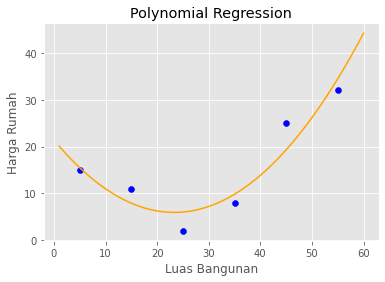

In [112]:
# optional - visualisasi

# data awal
plt.scatter(x=x, y=y, color="blue")

# data dummy dari x = 1 sampai x = 60
x_dummy = np.arange(1,61).reshape((-1,1))
x_dummy_poly = transformer.fit_transform(x_dummy)

y_pred = model.predict(x_dummy_poly)

# data prediksi untuk x = 1 sampai x= 60, y nya berapa
plt.plot(x_dummy, y_pred, color="orange")

plt.title("Polynomial Regression")
plt.xlabel("Luas Bangunan")
plt.ylabel("Harga Rumah")

In [114]:
# mencoba polynomial regression dengan data asli
# import data
df_tun = pd.read_csv("dataset/Tunisia.csv")
df_tun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12748 entries, 0 to 12747
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category        12748 non-null  object 
 1   room_count      12748 non-null  float64
 2   bathroom_count  12748 non-null  float64
 3   size            12748 non-null  float64
 4   type            12748 non-null  object 
 5   price           12748 non-null  float64
 6   city            12748 non-null  object 
 7   region          12748 non-null  object 
 8   log_price       12748 non-null  float64
dtypes: float64(5), object(4)
memory usage: 896.5+ KB


In [128]:
# encode city dan region
le = LabelEncoder()
encoded_city = le.fit_transform(df_tun["city"])
df_key_city = pd.DataFrame({"city":le.classes_})

encoded_region = le.fit_transform(df_tun["region"])
df_key_region = pd.DataFrame({"region":le.classes_})

display(df_key_city)
display(df_key_region)
print(encoded_city)
print(encoded_region)

,city
0,Ariana
1,Ben arous
2,Bizerte
3,Béja
4,Gabès
5,Gafsa
6,Jendouba
7,Kairouan
8,Kasserine
9,Kébili


,region
0,Agareb
1,Agba
2,Ain Draham
3,Akouda
4,Amdoun
...,...
252,Zaghouan
253,Zaouit-Ksibat Thrayett
254,Zarzis
255,Zarzouna


[ 0  0  0 ... 22 22 22]
[187   7   7 ... 136 136 217]


In [158]:
# siapin data
size = df_tun["size"]

fitur = pd.DataFrame({"size":size, "city":encoded_city, "region":encoded_region})

transformer = PolynomialFeatures(degree =5, include_bias=False)

fitur_poly = transformer.fit_transform(fitur)

target = df_tun["price"]

print(fitur_poly)
print(fitur_poly.shape)
print(target)
print(target.shape)

[[-1.00000000e+00  0.00000000e+00  1.87000000e+02 ...  0.00000000e+00
   0.00000000e+00  2.28669390e+11]
 [-1.00000000e+00  0.00000000e+00  7.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  1.68070000e+04]
 [ 8.00000000e+01  0.00000000e+00  7.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  1.68070000e+04]
 ...
 [ 7.60000000e+02  2.20000000e+01  1.36000000e+02 ...  1.21748070e+09
   7.52624435e+09  4.65258742e+10]
 [ 1.90000000e+02  2.20000000e+01  1.36000000e+02 ...  1.21748070e+09
   7.52624435e+09  4.65258742e+10]
 [ 7.00000000e+01  2.20000000e+01  2.17000000e+02 ...  4.94566349e+09
   4.87822263e+10  4.81170141e+11]]
(12748, 55)
0         100000.0
1         316000.0
2            380.0
3             70.0
4         170000.0
           ...    
12743    3200000.0
12744        600.0
12745    1950000.0
12746     240000.0
12747        500.0
Name: price, Length: 12748, dtype: float64
(12748,)


In [159]:
# bikin model, latih model
model = LinearRegression()
model.fit(fitur_poly, target)

LinearRegression()

In [160]:
# evaluasi
model.score(fitur_poly, target)

0.005244043245529739